<a href="https://colab.research.google.com/github/Syilun/TibameAI04/blob/master/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test)= load_data()

In [26]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [27]:
trans = [
    "airplane",										
    "automobile",										
    "bird",										
    "cat",										
    "deer",										
    "dog",										
    "frog",										
    "horse",										
    "ship",										
    "truck"
]

horse


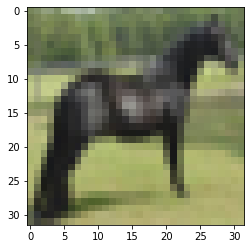

In [70]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

i = random.randint(0, 49999)
print(trans[y_train[i][0]])
plt.imshow(x_train[i])


In [71]:

from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
layers = [
    # 3 * 3 * 3(一個過濾器) * 64(個) + 64(bias) = 1792
    Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # 3 * 3 * 64(一個過濾器) * 128(個) + 128(bias) = 73856
    Conv2D(128, 3, padding="same", activation="relu"),
    MaxPooling2D(),    
    Conv2D(256, 3, padding="same", activation="relu"),
    # MaxPooling2D(),
    BatchNormalization(),
    GlobalAveragePooling2D(),
    # Dense(256, activation="relu"),
    # Dropout(0.25),
    Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

# 使用時機: 預防看到不可預期的東西，看訓練與測試資料集差別的大小
# dropout，假設機率設為1/2，代表我在訓練時要花2倍的力量去訓練，故測試時要乘上1/2

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
batch_normalization_6 (Batch (None, 8, 8, 256)         1024      
_________________________________________________________________
global_average_pooling2d_10  (None, 256)             

In [72]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
              optimizer='adam',
              metrics=['accuracy'])

# 有SparseCategoricalCrossentropy不用做one-hot encoding，他會幫你做


In [73]:
x_train_norm = x_train / 255.
x_test_norm = x_test / 255.

In [74]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callbacks = [
    ModelCheckpoint("cnn.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)       
]
model.fit(
    x_train_norm, 
    y_train, 
    batch_size=200,
    validation_split=0.1,
    epochs=50,
    callbacks=callbacks
    )

Epoch 1/50
225/225 [==============================] - 3s 14ms/step - loss: 1.4941 - accuracy: 0.4606 - val_loss: 1.8938 - val_accuracy: 0.2584
Epoch 2/50
225/225 [==============================] - 3s 13ms/step - loss: 1.1357 - accuracy: 0.5987 - val_loss: 1.3485 - val_accuracy: 0.5732
Epoch 3/50
225/225 [==============================] - 3s 13ms/step - loss: 0.9723 - accuracy: 0.6618 - val_loss: 1.1042 - val_accuracy: 0.6162
Epoch 4/50
225/225 [==============================] - 3s 13ms/step - loss: 0.8645 - accuracy: 0.6986 - val_loss: 1.2976 - val_accuracy: 0.5558
Epoch 5/50
225/225 [==============================] - 3s 13ms/step - loss: 0.7841 - accuracy: 0.7325 - val_loss: 0.9344 - val_accuracy: 0.6756
Epoch 6/50
225/225 [==============================] - 3s 13ms/step - loss: 0.7139 - accuracy: 0.7558 - val_loss: 1.0037 - val_accuracy: 0.6688
Epoch 7/50
225/225 [==============================] - 3s 14ms/step - loss: 0.6567 - accuracy: 0.7735 - val_loss: 0.9129 - val_accuracy: 0.6720

In [75]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6432 - accuracy: 0.7813


[0.643239438533783, 0.7813000082969666]

In [76]:
pre = model.predict_classes(x_test_norm)
pre

array([3, 1, 8, ..., 5, 1, 7])

In [77]:
print(pre.shape)
print(y_test.shape)
y_test_reshape = y_test.reshape(-1)
print(y_test_reshape.shape)

(10000,)
(10000, 1)
(10000,)


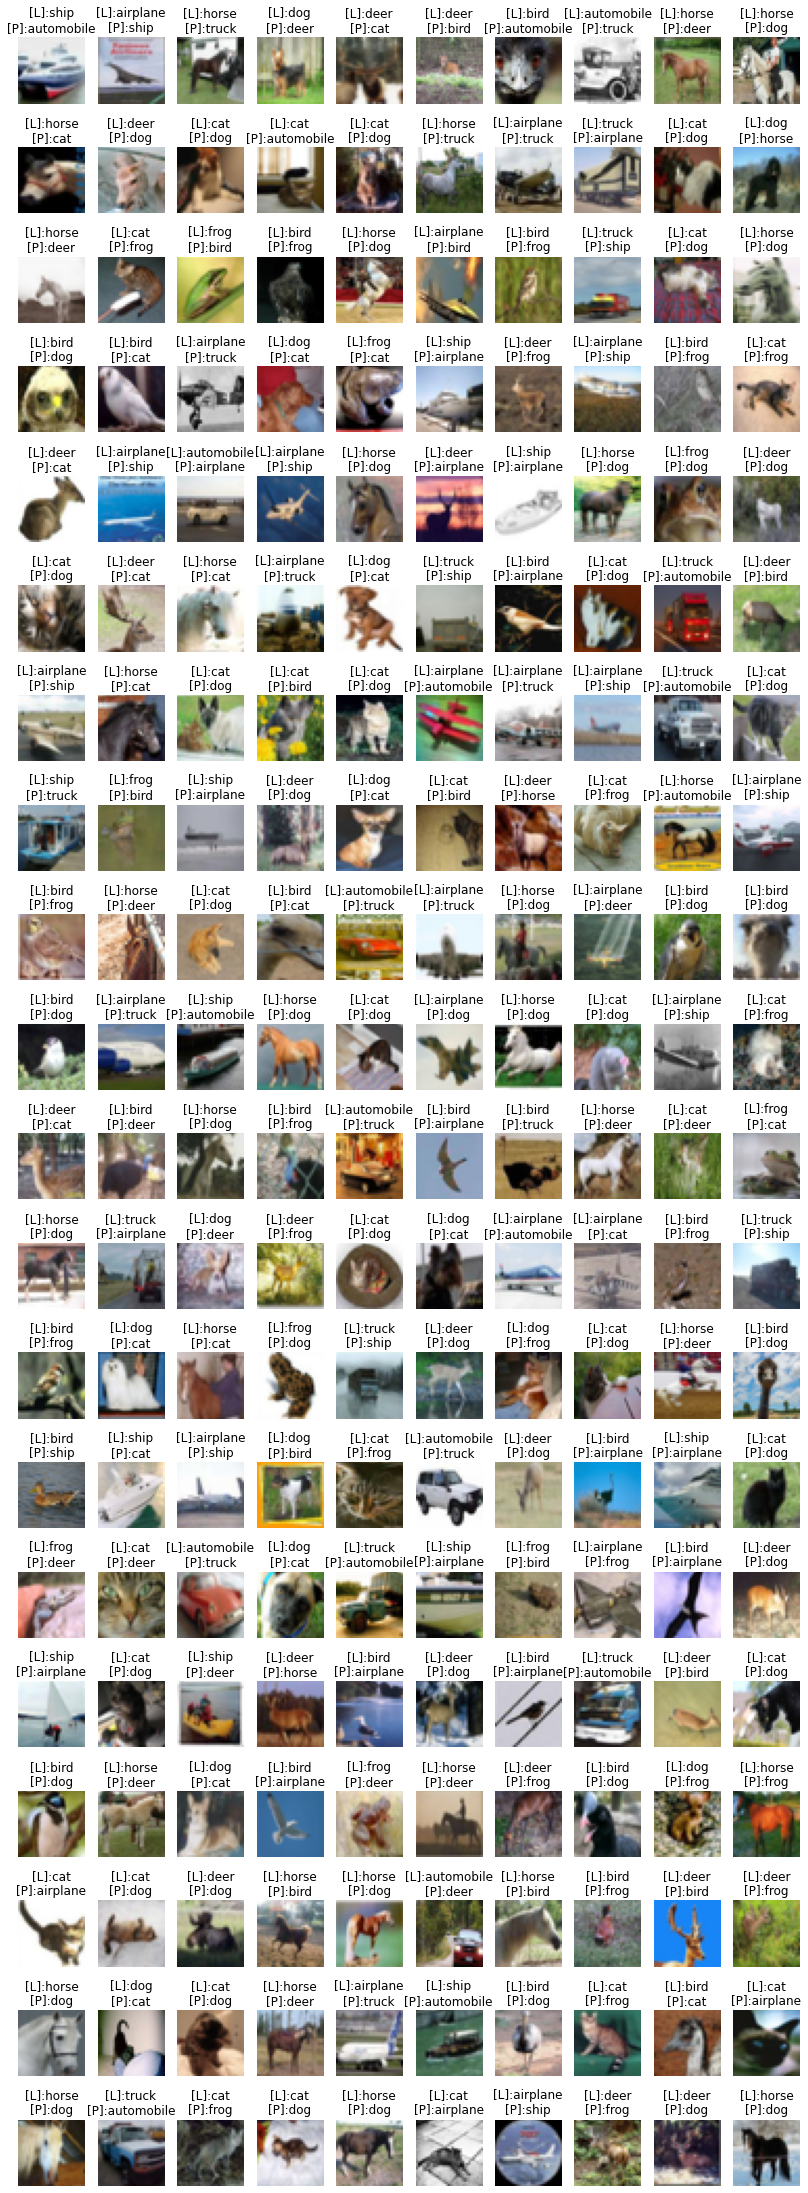

In [78]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(14, 42))
idx = np.nonzero(pre != y_test_reshape)[0]
idx = idx[:200]
width = 10
height = len(idx) // width + 1
for i, d  in enumerate(idx):
    img, label, p = x_test[d], y_test_reshape[d], pre[d]
    t = "[L]:{}\n[P]:{}".format(trans[label], trans[p])
    plt.subplot(height, width, i+1)
    plt.title(t)
    plt.axis("off")
    plt.imshow(img)

輸入網址:https://media.istockphoto.com/vectors/illustration-isolated-emoji-character-cartoon-deer-crying-lot-of-vector-id636736400


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


airplane 的機率: 0.02
automobile 的機率: 0.0
bird 的機率: 0.14
cat 的機率: 0.02
deer 的機率: 0.81
dog 的機率: 0.02
frog 的機率: 0.0
horse 的機率: 0.0
ship 的機率: 0.0
truck 的機率: 0.0


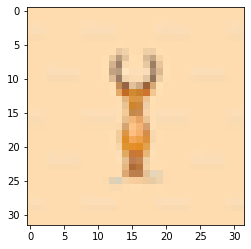

In [80]:
import requests
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img

url = input("輸入網址:")
# 純文字: stream不加, 檔案: stream=True
# verify=False 防火牆調低
response = requests.get(url, stream=True, verify=False)
img = Image.open(response.raw).resize((32, 32))
img = np.array(img)
img_np = np.array(img).reshape(1, 32, 32, 3) / 255.
pre = model.predict(img_np)[0]
for i in range(10):
    print(trans[i], "的機率:", round(pre[i], 2))
plt.imshow(np.array(img), cmap="Reds")